In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from datetimerange import DateTimeRange
import seaborn as sns

In [2]:
#pd_incidents = gpd.read_file('../data/PD_Incidents.geojson')

In [3]:
#pd_incidents_2020 = pd_incidents[pd_incidents['incident_occurred'].str.contains('2020')]

In [4]:
#pd_incidents_2020.incident_occurred.sort_values()

In [5]:
#pd_incidents_2020.columns

In [6]:
#pd_incidents_2020.to_file('../data/pd_incidents_2020.geojson')

In [7]:
pd_incidents_2020 = gpd.read_file('../data/pd_incidents_2020.geojson/')

In [8]:
pd_incidents_2020['incident_o'] = pd.to_datetime(pd_incidents_2020['incident_o'])
pd_incidents_2020.columns

Index(['victim_cou', 'zip_code', 'victim_num', 'offense_ni', 'rpa', 'latitude',
       'victim_rac', 'incident_n', 'investigat', 'offense_nu', 'offense_de',
       'longitude', 'domestic_r', 'victim_eth', 'incident_l', 'victim_des',
       'location_c', 'report_typ', 'incident_r', 'weapon_des', 'location_d',
       'weapon_pri', 'report_t_1', 'victim_typ', 'incident_s', 'incident_1',
       'zone', 'victim_gen', 'incident_o', 'primary_ke', 'geometry'],
      dtype='object')

In [9]:
pd_incidents_2020.report_t_1.value_counts()

DISPATCHED    79235
SUSPECT        8549
WITNESS        1011
Name: report_t_1, dtype: int64

In [10]:
#def extract_date(date)
keep_dates_pre = []
for f in pd_incidents_2020['incident_o']:
    if f >= 0o2/0o3/2020 and f < 0o3/0o3/2020:
        keep_dates_pre.append(True)
    else:
        keep_dates_pre.append(False)
#append it to a list

TypeError: '>=' not supported between instances of 'Timestamp' and 'float'

In [11]:
before = pd_incidents_2020[(pd_incidents_2020['incident_o'] >= '04/26/2020') &
                                              (pd_incidents_2020['incident_o'] <= '05/10/2020 23:59:59')]

In [12]:
before['date'] = before['incident_o'].dt.strftime('%Y-%m-%d')

C:\Users\heath\anaconda3\envs\geospatial\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [13]:
before = before.sort_values(by='date')
before.shape

(4238, 32)

In [14]:
before_date_df = before.date.value_counts().to_frame().reset_index()
before_date_df['index'] = pd.to_datetime(before_date_df['index'])
before_date_df['day']= before_date_df['index'].dt.strftime('%m/%d')
before_date_df = before_date_df.sort_values(by='day')
before_date_df

,index,date,day
8,2020-04-26,265,04/26
6,2020-04-27,294,04/27
4,2020-04-28,306,04/28
10,2020-04-29,259,04/29
5,2020-04-30,304,04/30
0,2020-05-01,338,05/01
3,2020-05-02,311,05/02
13,2020-05-03,232,05/03
11,2020-05-04,259,05/04
2,2020-05-05,318,05/05


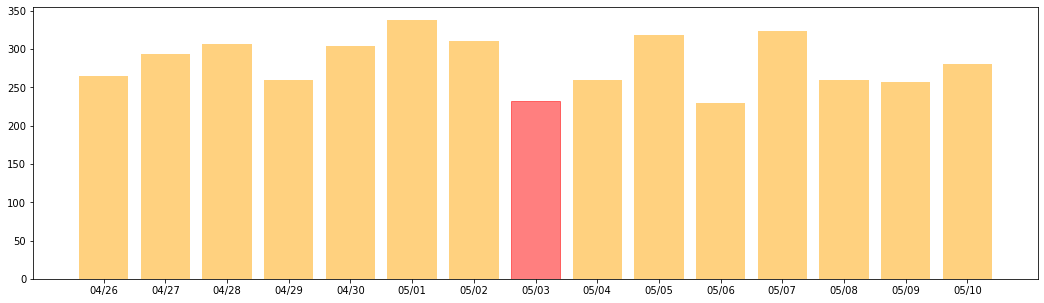

In [15]:
f, ax = plt.subplots(figsize=(18,5)) # set the size that you'd like (width, height)
derecho_chart = plt.bar(before_date_df['day'], before_date_df['date'], color = 'orange', alpha = 0.5)
derecho_chart[7].set_color('r')
plt.savefig('../data/chart1')
#ax.legend(fontsize = 14)

In [16]:
may_03 = pd_incidents_2020[pd_incidents_2020]

NotImplementedError: fillna currently only supports filling with a scalar geometry

In [1]:
pd_incidents_2020['keep_dates_pre'] = keep_dates_pre

NameError: name 'keep_dates_pre' is not defined

In [18]:
pd_pre_tornado = pd_incidents_2020[pd_incidents_2020['keep_dates_pre'] == True]

KeyError: 'keep_dates_pre'

In [19]:
pd_pre_tornado.info()

NameError: name 'pd_pre_tornado' is not defined

In [20]:
pd_pre_tornado.sort_values(by='incident_o').tail()

NameError: name 'pd_pre_tornado' is not defined

In [ ]:
pd_pre_tornado.report_t_1.value_counts()

In [ ]:
pd_pre_tornado.columns

In [ ]:
#def extract_date(date)
keep_dates_post = []
for f in pd_incidents_2020['incident_o']:
    if f >= '2020-03-03T00:00:00' and f < '2020-04-03T00:00:00':
        keep_dates_post.append(True)
    else:
        keep_dates_post.append(False)
#append it to a list

In [ ]:
pd_incidents_2020['keep_dates_post'] = keep_dates_post

In [ ]:
pd_post_tornado = pd_incidents_2020[pd_incidents_2020['keep_dates_post'] == True]

In [ ]:
pd_post_tornado.shape

In [ ]:
pd_post_tornado.sort_values(by='incident_o').tail()

In [ ]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
zipcodes.head(2)

In [ ]:
#read in file that contains the path and strength of the tornado
tornado = pd.read_csv('../data/tornado.csv')
tornado.head(2)

In [ ]:
#create geometry column
tornado['geometry'] = tornado.apply(lambda x: Point((float(x.longitude), 
                                                         float(x.latitude))), 
                                        axis=1)

In [ ]:
#make tornado a geo data frame
tornado_geo = gpd.GeoDataFrame(tornado, 
                                     crs = zipcodes.crs,
                                     geometry = tornado['geometry'])

In [ ]:
tornado_geo_zipcodes = gpd.sjoin(tornado_geo, zipcodes, op = 'within')

In [ ]:
tornado_geo_zipcodes.shape

In [ ]:
tornado_force = ['EF5', 'EF4', 'EF3', 'EF2'] # here I define the strength I want to plot
tornado_lat_low = 36.168 # this is the geographic latitude range
tornado_lat_high = 36.188
#now keep only the records where strength is greater than EF1
tornado_stronger_than_EF1 = tornado_geo_zipcodes.loc[tornado_geo_zipcodes['EF_Scale'].isin(tornado_force)]
#tornado.shape
tornado_stronger_than_EF1.shape

In [ ]:
pre_tornado_incidents_zipcodes = gpd.sjoin(pd_pre_tornado, zipcodes, op = 'within')

In [ ]:
pre_tornado_incidents_zipcodes.head()

In [ ]:
pre_breakdown =pre_tornado_incidents_zipcodes.groupby('zip').size().to_frame().reset_index()
pre_breakdown.columns = ['zipcodes', 'incidents']
pre_breakdown = pre_breakdown.sort_values(by = 'incidents', ascending = False)
pre_breakdown

In [ ]:
post_tornado_incidents_zipcodes = gpd.sjoin(pd_post_tornado, zipcodes, op = 'within')
post_tornado_incidents_zipcodes.shape

In [ ]:
post_breakdown =post_tornado_incidents_zipcodes.groupby('zip').size().to_frame().reset_index()
post_breakdown.columns = ['zipcodes', 'incidents']
post_breakdown = post_breakdown.sort_values(by = 'incidents', ascending = False)
post_breakdown

#zipcodes	points
6	37214	42
2	37206	40
3	37208	36
4	37209	32
0	37076	20
1	37201	4
5	37213	1
7	37218	1

In [ ]:
tornado_zipcodes = ['37214', '37206', '37208', '37209', '37076', '37201', '37213', '37218']

In [ ]:
pre_tornado_in = pre_tornado_incidents_zipcodes.loc[pre_tornado_incidents_zipcodes['zip'].isin(['37214', '37206', '37208', '37209', '37076', '37201', '37213', '37218'])]

In [ ]:
pre_tornado_in.head()

In [ ]:
pre_tornado_out = pre_tornado_incidents_zipcodes.loc[~pre_tornado_incidents_zipcodes['zip'].isin(['37214', '37206', '37208', '37209', '37076', '37201', '37213', '37218'])]

In [ ]:
pre_tornado_out.head()

In [ ]:
post_tornado_in = post_tornado_incidents_zipcodes.loc[post_tornado_incidents_zipcodes['zip'].isin(['37214', '37206', '37208', '37209', '37076', '37201', '37213', '37218'])]

In [ ]:
post_tornado_out = post_tornado_incidents_zipcodes.loc[~post_tornado_incidents_zipcodes['zip'].isin(['37214', '37206', '37208', '37209', '37076', '37201', '37213', '37218'])]

In [ ]:
post_tornado_in.head()

In [ ]:
post_tornado_out.head()

In [ ]:
pre_tornado_incidents_zipcodes.latitude.astype(float)

In [ ]:
tornado_map = folium.Map(location = (36.16784, -86.77816), zoom_start = 11, tiles = 'Stamen Terrain')
    #scrollWheelZoom=False)

feature_group = folium.FeatureGroup(name='Zipcodes', show=True )
feature_group1 = folium.FeatureGroup(name='Tornado Path', show=False )
feature_group2 = folium.FeatureGroup(name='Pre Tornado Police Incidents', show=False)
feature_group3 = folium.FeatureGroup(name='Post Tornado Police Incidents', show=False)

tornado_map.add_child(feature_group)
tornado_map.add_child(feature_group1)
tornado_map.add_child(feature_group2)
tornado_map.add_child(feature_group3)


folium.GeoJson(zipcodes['geometry']).add_to(feature_group)
#marker_cluster2 = MarkerCluster().add_to(feature_group2)
#marker_cluster3 = MarkerCluster().add_to(feature_group3)

def color(latitude):
    if 36.168 < float(latitude) < 36.188:
        col = 'orange'
    else:
        col='blue'
    return col

points_plt=[]
for ind, row in tornado_stronger_than_EF1.iterrows():
    point = [row['latitude'], row['longitude']]
    popup = 'Tornado strength ' + str(row['EF_Scale']) + ' at ' + str(row['latitude']) + ": " +str(row['longitude'])

    #now color format based on the strength of the tornado
    if row['EF_Scale']=="EF3":
        folium.Marker(point, popup = popup, icon = folium.Icon(color='darkred', icon='bolt', prefix='fa')) #.add_to(map_tornado)
        points_plt.append(point)
    else:
        folium.Marker(point, popup = popup, icon = folium.Icon(color='lightred', icon='bolt', prefix='fa')) #.add_to(map_tornado)
        points_plt.append(point)
        
folium.PolyLine(locations = points_plt, color="red", weight=5, opacity=1).add_to(feature_group1)

for row_index, row_values in pre_tornado_incidents_zipcodes.iterrows():
    point = [row_values['latitude'], row_values['longitude']]
    pop = str(row_values['offense_de'])
    
    marker = folium.CircleMarker(point, radius=1, popup = pop, fill=True, color=color(row_values['latitude'])).add_to(feature_group2)

for row_index, row_values in post_tornado_incidents_zipcodes.iterrows():
    point = [row_values['latitude'], row_values['longitude']]
    popup = str(row_values['offense_de'])
    
    marker = folium.CircleMarker(point, radius=1, popup = pop, fill=True, color=color(row_values['latitude'])).add_to(feature_group3)
        
#
#for row_index, row_values in pre_tornado_in.iterrows():
#    loc = [row_values['latitude'], row_values['longitude']]
#    pop = str(row_values['offense_de'])
#
#    marker = folium.CircleMarker(loc, radius=1, popup = pop, fill=True, color='orange').add_to(feature_group2)
#
#    #marker.add_to(marker_cluster2)
#    
#for row_index, row_values in pre_tornado_out.iterrows():
#    loc = [row_values['latitude'], row_values['longitude']]
#    pop = str(row_values['offense_de'])
#
#    marker = folium.CircleMarker(loc, radius=1, popup = pop, fill=True, color='blue').add_to(feature_group2)
#
#    #marker.add_to(marker_cluster2)

# turn on layer control
tornado_map.add_child(folium.map.LayerControl(collapsed = False))

In [ ]:
pre_tornado_points_zip = pd.merge(zipcodes, pre_breakdown, left_on = 'zip', right_on = 'zipcodes')
pre_tornado_points_zip.head()

In [ ]:
post_tornado_points_zip = pd.merge(zipcodes, post_breakdown, left_on = 'zip', right_on = 'zipcodes')
post_tornado_points_zip.head()

In [ ]:
fig, ax = plt.subplots(figsize=(26,15))
pre_tornado_points_zip.plot(column = 'incidents', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
for index, row in zipcodes.iterrows():
    plt.annotate(text=row['zip'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontweight = 'bold')
plt.title('Police Incidents Pre Tornado', fontsize = 14);
ax.axis('off');

In [ ]:
# Need to normalize this

fig, ax = plt.subplots(figsize=(26,15))
post_tornado_points_zip.plot(column = 'incidents', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
for index, row in zipcodes.iterrows():
    plt.annotate(text=row['zip'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontweight = 'bold')
plt.title('Police Incidents Post Tornado', fontsize = 14);
ax.axis('off');

In [ ]:
pre_tornado_out.victim_num.count()

In [ ]:
pre_tornado_in.victim_num.count()

In [ ]:
post_tornado_out.victim_num.count()

In [ ]:
post_tornado_in.victim_num.count()

In [ ]:
pd_before_chart = {'pre_in_tornado_path': '2886', 'pre_out_tornado_path': '6247', 'post_in_tornado_path': '2760', 'post_out_tornado_path': '6349'}

In [ ]:
data = [2886, 6247, 2760, 6349]
plt.bar(['pre_in_tornado_path', 'pre_out_tornado_path','post_in_tornado_path', 'post_out_tornado_path'], data)
plt.show()

In [ ]:
keep_dates_pre_week = []
for f in pd_incidents_2020['incident_o']:
    if f >= '2020-02-25T00:00:00' and f < '2020-03-03T00:00:00':
        keep_dates_pre_week.append(True)
    else:
        keep_dates_pre_week.append(False)

In [ ]:
pd_incidents_2020['keep_dates_pre_week'] = keep_dates_pre_week

In [ ]:
pd_pre_tornado_week = pd_incidents_2020[pd_incidents_2020['keep_dates_pre_week'] == True]

In [ ]:
pd_pre_tornado_week.incident_o.sort_values().shape

In [ ]:
keep_dates_post_week = []
for f in pd_incidents_2020['incident_o']:
    if f >= '2020-03-03T00:00:00' and f < '2020-03-10T00:00:00':
        keep_dates_post_week.append(True)
    else:
        keep_dates_post_week.append(False)

In [ ]:
pd_incidents_2020['keep_dates_post_week'] = keep_dates_post_week

In [ ]:
pd_post_tornado_week = pd_incidents_2020[pd_incidents_2020['keep_dates_post_week'] == True]

In [ ]:
pd_post_tornado_week.incident_o.sort_values().shape

In [ ]:
pd_pre_tornado_week.offense_de.value_counts()

In [ ]:
pd_post_tornado_week.offense_de.value_counts()